<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/%20https:/cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# **Launch Sites Locations Analysis with Folium**


Estimated time needed: **40** minutes


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


## Objectives


This lab contains the following tasks:

*   **TASK 1:** Mark all launch sites on a map
*   **TASK 2:** Mark the success/failed launches for each site on the map
*   **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [1]:
!pip3 install folium
!pip3 install wget

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
#-------  For centering figures 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
import folium
import wget
import pandas as pd

In [4]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


[Generating Maps with Python](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module\_3/DV0101EN-3-5-1-Generating-Maps-in-Python-py-v2.0.ipynb)


## Task 1: Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.


In [5]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)
spacex_df0=spacex_df #(saving initial dataframe for future use)
spacex_df.head(50)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.00,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.00,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.00,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.00,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.00,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
5,7,2013-12-03,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,3170.00,GTO,SES,No attempt,0,28.562302,-80.577356
6,8,2014-01-06,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,3325.00,GTO,Thaicom,No attempt,0,28.562302,-80.577356
7,9,2014-04-18,19:25:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,2296.00,LEO (ISS),NASA (CRS),Controlled (ocean),0,28.562302,-80.577356
8,10,2014-07-14,15:15:00,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,1316.00,LEO,Orbcomm,Controlled (ocean),0,28.562302,-80.577356
9,11,2014-08-05,8:00:00,F9 v1.1,CCAFS LC-40,AsiaSat 8,4535.00,GTO,AsiaSat,No attempt,0,28.562302,-80.577356


Now, you can take a look at what are the coordinates for each site.


In [6]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [7]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example,


<span style="color:blue"> **Examples:** </span>  https://medium.com/datasciencearth/map-visualization-with-folium-d1403771717
        

In [8]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
# Apparently "radius variable" is in meter.  
circle = folium.Circle(nasa_coordinate, radius=1000, color='#FCCC00', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle.


Now, let's add a circle for each launch site in data frame `launch_sites`


*TODO:*  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [9]:
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [10]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for index, site in launch_sites_df.iterrows():
    cord = [site['Lat'],site['Long']]
    circle = folium.Circle(location = cord, radius=50, color='#d35400', fill=True).add_child(folium.Popup(site['Launch Site']))
    # code for the marker
    marker = folium.map.Marker(cord,
                               icon=DivIcon(
                                   icon_size=(20,20), 
                                   icon_anchor=(0,0),
                                   html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % site['Launch Site'],
                               )
                              )
    site_map.add_child(circle)
    site_map.add_child(marker)
site_map



The generated map with marked launch sites should look similar to the following:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png" />
</center>


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:

*   Are all launch sites in proximity to the Equator line?
*   Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.



    
<span style="color:#0094cf;"> 1- Launch sites are in the south of the United States. As close as possible to the Equator. 
The trajectory of a launched rocket is parabolic as shown in the picture below: </span>

https://www.scienceabc.com/nature/universe/why-do-rockets-follow-a-curved-trajectory-while-going-into-space.html

https://www.scienceabc.com/wp-content/uploads/2016/10/Rocket-launch-in-space-diagram1-768x512.jpg

    
<span style="color:#0094cf;"> Earth tangential velocity is maximum at the equator ~1,675 km/h from west to east. Therefore launching a rocket at the equator is more efficient, it acts as a natural "boost" of horizontal or tangential velocity. That saves energy. It is particularly critical when the payload: satellites are supposed to attain the geostationary orbit (GEO), for example: communication satellites, via the Geostationary Transfer Orbit (GTO) when the payload was released by the launcher. Note that the GTO is elliptic.  </span>
    
https://www.esa.int/ESA_Multimedia/Images/2020/03/Geostationary_transfer_orbit
    
<span style="color:#0094cf;"> From that point of view, the European Space Agency and Arianespace (Ariane Group) have an advantage over SpaceX, since their launch site is in Kourou, French Guyana, basically on the Equator. 
One way for improving the situation is a launch site in the ocean, closer to the equator, but this may not work for very heavy payloads. </span>

<span style="color:#0094cf;"> 2- Sites are in very close proximity to the coast, and in general far from inhabited areas, for safety reasons. If something turns bad during the early stages of the rocket launch. Also for a safe "landing" of boosters.  
Note that launches from California are not ideal for a geostationary orbit or a GTO, if rockets are launched with a East-West parabolic trajectory above the Pacific ocean.  </span>
<span style="color:#0094cf;"> Let's check the dependency "orbit v. launch site":  </span>


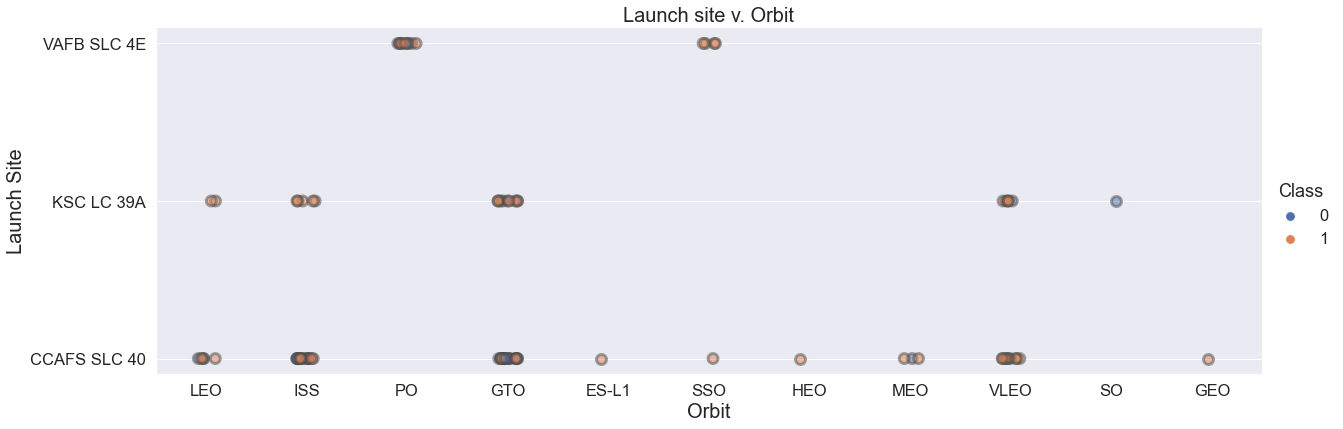

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

sns.set(font_scale = 1.5)
sns.catplot(y="LaunchSite", x="Orbit", hue="Class", data=df, s=10,
               alpha=0.5, linewidth=3, height=6, aspect=3)
plt.title("Launch site v. Orbit",fontsize=20)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

<span style="color:#0094cf;">  As expected, launch Site VAFB SLCE in California is never used for GTO or GEO orbits.  Just for PO, Polar orbit or SSO, Sun-synchronous orbit, which is a particular kind of polar orbit. Both are low altitude orbits, typically between 600-800 km.  </span>

https://www.esa.int/ESA_Multimedia/Images/2020/03/Polar_and_Sun-synchronous_orbit    

# Task 2: Mark the success/failed launches for each site on the map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [12]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records.
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


In [13]:
marker_cluster = MarkerCluster()


*TODO:* Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value


In [14]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(5)




C:\Users\stefo\AppData\Local\Temp/ipykernel_10324/1983293403.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)


,Launch Site,Lat,Long,class,marker_color
51,CCAFS SLC-40,28.563197,-80.57682,0,red
52,CCAFS SLC-40,28.563197,-80.57682,0,red
53,CCAFS SLC-40,28.563197,-80.57682,0,red
54,CCAFS SLC-40,28.563197,-80.57682,1,green
55,CCAFS SLC-40,28.563197,-80.57682,0,red


*TODO:* For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`


Example found in:  https://www.python-graph-gallery.com/312-add-markers-on-folium-map
 

Import the pandas library
import pandas as pd

#Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lon':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lat':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10, 12, 40, 70, 23, 43, 100, 43]
}, dtype=str)

data

    
for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
   ).add_to(m)


In [15]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)    
    marker=folium.Marker(location=[record['Lat'], record['Long']], popup=record['marker_color'])#.add_to(marker_cluster)
    icon=folium.Icon(color='white',icon_color=record['marker_color']).add_to(marker)

    marker_cluster.add_child(marker)

site_map


# Add marker_cluster to current site_map
#site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
#for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
#    marker_cluster.add_child(marker)

#site_map





Your updated map may look like the following screenshots:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png" />
</center>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png" />
</center>


From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


# TASK 3: Calculate the distances between a launch site to its proximities


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [16]:
#from folium.plugins import MousePosition

# DOES NOT WORK WITH MY INSTALLATION 
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
#formatter = "function(num) {return L.Util.formatNum(num, 5);};"
#mouse_position = MousePosition(
#    position='topright',
#    separator=' Long: ',
#    empty_string='NaN',
#    lng_first=False,
#    num_digits=20,
#    prefix='Lat:',
#    lat_formatter=formatter,
#    lng_formatter=formatter,
#)

#site_map.add_child(mouse_position)
#site_map


#m = folium.Map()
m=site_map
formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

MousePosition(
    position="topright",
    separator=" | ",
    empty_string="NaN",
    lng_first=True,
    num_digits=20,
    prefix="Coordinates:",
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m)

m


Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


You can calculate the distance between two points on the map based on their `Lat` and `Long` values using the following method:


In [17]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

*TODO:* Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [18]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

In [19]:

spacex_df0['Launch Site'].unique()
#spacex_df0.loc[spacex_df['Launch Site'] =='CCAFS  SLC-40']
#spacex_df0.tail(10)
spacex_df0.tail(1)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
55,56,2018-06-04,4:45:00,F9 B4 B1040.2,CCAFS SLC-40,SES-12,5384.0,GTO,SES,No attempt,0,28.563197,-80.57682


In [20]:

 ###	28.563197 	-80.576820

CCAFS_SLC40_lat= 28.563197
CCAFS_SLC40_long= -80.576820
# we identify a point on the cost such as distance is minimized...
Coast_point1_lat= 28.563
Coast_point1_long= -80.568

distance_Coast_point1 = calculate_distance(CCAFS_SLC40_lat, CCAFS_SLC40_long, Coast_point1_lat, Coast_point1_long)

print('Distance CCAFS_SLC40 to coast P1:', distance_Coast_point1 ,' km')



Distance CCAFS_SLC40 to coast P1: 0.8619235359004858  km


*TODO:* After obtained its coordinate, create a `folium.Marker` to show the distance


In [21]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )

distance_marker = folium.Marker(
   [Coast_point1_lat, Coast_point1_long],
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_Coast_point1),
       )
   )
site_map.add_child(distance_marker)



*TODO:* Draw a `PolyLine` between a launch site to the selected coastline point


In [22]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# lines=folium.PolyLine(locations=coordinates, weight=1)
#site_map.add_child(lines)

coordinates = [[CCAFS_SLC40_lat,CCAFS_SLC40_long],[Coast_point1_lat,Coast_point1_long]]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)
#------------





Your updated map with distance line should look like the following screenshot:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png" />
</center>


*TODO:* Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png" />
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png" />
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png" />
</center>


In [23]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site

#CCAFS_SLC40_lat= 28.563197
#CCAFS_SLC40_long= -80.576820
# we identify a point on the cost such as distance is minimized...
#Coast_point1_lat= 28.563
#Coast_point1_long= -80.568


#Florida East Coast Railway (FECR) at about the same latitude
FECR_lat= 28.558
FECR_long= -80.802

distance_FECR = calculate_distance(CCAFS_SLC40_lat, CCAFS_SLC40_long, FECR_lat, FECR_long)
print('Distance CCAFS_SLC40 to Florida East Coast Railway:', distance_FECR  ,' km')

# Heavy traffic highway - Highway I95 
I95_lat= 28.563
I95_long= -80.851
distance_I95 = calculate_distance(CCAFS_SLC40_lat, CCAFS_SLC40_long, I95_lat, I95_long)
print('Distance CCAFS_SLC40 to Highway I95:', distance_I95  ,' km')

# Large city nearby: Orlando 
ORL_lat= 28.531
ORL_long= -81.382
distance_ORL = calculate_distance(CCAFS_SLC40_lat, CCAFS_SLC40_long, ORL_lat, ORL_long)
print('Distance CCAFS_SLC40 to Orlando:', distance_ORL  ,' km')


Distance CCAFS_SLC40 to Florida East Coast Railway: 22.00643610358883  km
Distance CCAFS_SLC40 to Highway I95: 26.78524287894568  km
Distance CCAFS_SLC40 to Orlando: 78.75305873849611  km


In [24]:
# Florida East Coast Railway (FECR) at the same latitude

distance_marker = folium.Marker(
   [FECR_lat, FECR_long],
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_FECR),
       )
   )
site_map.add_child(distance_marker)

coordinates = [[CCAFS_SLC40_lat,CCAFS_SLC40_long],[FECR_lat, FECR_long]]
lines=folium.PolyLine(locations=coordinates, weight=3, color='black')
site_map.add_child(lines)

# Heavy traffic highway - Highway I95 

distance_marker = folium.Marker(
   [I95_lat, I95_long],
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_I95),
       )
   )
site_map.add_child(distance_marker)

coordinates = [[CCAFS_SLC40_lat,CCAFS_SLC40_long],[I95_lat, I95_long]]
lines=folium.PolyLine(locations=coordinates, weight=3, color='green')
site_map.add_child(lines)

#-- ORLANDO

distance_marker = folium.Marker(
   [ORL_lat, ORL_long],
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_ORL),
       )
   )
site_map.add_child(distance_marker)

coordinates = [[CCAFS_SLC40_lat,CCAFS_SLC40_long],[ORL_lat, ORL_long]]
lines=folium.PolyLine(locations=coordinates, weight=3, color='red')
site_map.add_child(lines)




After you plot distance lines to the proximities, you can answer the following questions easily:

*   Are launch sites in close proximity to railways?
*   Are launch sites in close proximity to highways?
*   Are launch sites in close proximity to coastline?
*   Do launch sites keep certain distance away from cities?

Also please try to explain your findings.


<span style="color:#0094cf;"> Rocket launch sites are in very close proximity to the coast, and in general far from high population density areas: </span> 

<span style="color:#0094cf;">     *   Orlando ~ 80 km  </span>  \
<span style="color:#0094cf;">     *   Interstate I95: 27 km  </span> \
<span style="color:#0094cf;">     *   Florida East Coast Railway: 22 km  </span> 
        
<span style="color:#0094cf;">     for safety reasons if things turns bad during the early stages of the rocket launch. Particularly explosion on the launch site. Also for a safe "landing" of boosters or damaged launcher in the ocean. For reasons explained above, the rocket trajectory should be a parabole orientated west-east, above the ocean.  </span>

# Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01)


### Other Contributors


Joseph Santarcangelo


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description          |
| ----------------- | ------- | ---------- | --------------------------- |
| 2021-05-26        | 1.0     | Yan        | Created the initial version |


Copyright © 2021 IBM Corporation. All rights reserved.
